In [ ]:
### Course: Text Mining                #####
### Subject: 2024-2                    #####
### Title: Practice 01                 #####
### TEAM: 01                           #####
### Member: 22000028 Juha Gwak         #####
###         22000283 Yejun Park        #####
###         22000383 GiSung Shin       #####
############################################

In [ ]:
import pandas as pd
import numpy as np
import os
#data_path = "G:/내 드라이브/24-2/text_mining/assignment1/ASGN1"
data_path = '/Users/yejun_park/Library/CloudStorage/GoogleDrive-wnejdh1818@gmail.com/내 드라이브/24-2/text_mining/assignment1/ASGN1'
boston = pd.read_csv(os.path.join(data_path, 'Boston_set.csv'))


Question3


In [ ]:
#3-1
#Load “Boston_set.csv”to a variable called boston_set in Google Colab. Are there any
#missing values? Write down Python codes that check whether there are missing values or not.
boston.isna().sum()
#no na value found

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
#3-2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
Y = boston['medv']
X = boston[['crim', 'indus','nox','rm','age']]

stats_model = LinearRegression()
stats_model.fit(X,Y)
predict = stats_model.predict(X)
print(stats_model.coef_)
print(stats_model.intercept_)

[-0.18510226 -0.1335077  -3.44258899  7.67440715 -0.02584023]
-19.8607409941371


In [ ]:
from statsmodels.regression.linear_model import OLS

X = boston[['crim', 'indus','nox','rm','age']]
Y = boston['medv']
model = OLS(Y,X)
result = model.fit()
result.summary()
#explain R-squared value
#R-squared value is 0.934, which means 93.4% of the variance in the dependent variable can be explained by the independent variables.
#In other words, the model is a good fit for the data.

#coefficient
#since it uses 5 variables, it has 5 coefficients
#we can infer that the first coefficient is for 'crim', the second is for 'indus', the third is for 'nox', the fourth is for 'rm', and the fifth is for 'age'
# -values of coefficients shows that they have negative correlation with the target variable

#p-value
#p-value is the probability of observing a test statistic as extreme as the one computed from the sample data, assuming that the null hypothesis is true.
#the p-value of 'crim' is 0.000, which is less than 0.05, so we can reject the null hypothesis and infer that 'crim' is statistically significant.
#the p-value of 'indus' is 0.047, which is less than 0.05, so we can reject the null hypothesis and infer that 'indus' is statistically significant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              1425.
Date:                Thu, 12 Sep 2024   Prob (F-statistic):                   1.71e-293
Time:                        04:00:08   Log-Likelihood:                         -1644.2
No. Observations:                 506   AIC:                                      3298.
Df Residuals:                     501   BIC:                                      3320.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.1760      0.036     -4.856      0.000      -0.247      -0.105
indus         -0.1332      0.067     -1.989      0.047      -0.265      -0.002
nox          -15.0124      3.838     -3.912      0.000     -22.553      -7.472
rm             5.4574      0.217     25.141      0.000       5.031       5.884
age           -0.0172      0.015     -1.167      0.244      -0.046       0.012
==============================================================================
Omnibus:                      238.067   Durbin-Watson:                   0.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1364.133
Skew:                           2.015   Prob(JB):                    6.06e-297
Kurtosis:                       9.961   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#3-3
from sklearn.model_selection import train_test_split
X = boston[['crim', 'indus','nox','rm','age']]
Y = boston['medv']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1009)

In [ ]:
#3-4
ml_model = LinearRegression()
ml_model.fit(X_train,Y_train)
predict = ml_model.predict(X_test)
result = pd.DataFrame({'actual':Y_test, 'predict':predict})
result.head()

,actual,predict
74,24.1,24.610961
40,34.9,31.746349
118,20.4,20.126033
236,25.1,26.461193
85,26.6,27.475831


In [ ]:
ml_model.coef_

#slightly different from the previous model since the data is split into training and test data, and fitted only into training data.


array([-0.17876953, -0.16843074, -2.74727497,  7.55635297, -0.02411889])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y_test, predict)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predict)

In [ ]:
mse

39.79374300832402

In [ ]:
print(Y_test.max())
print(Y_test.min())

#Considering the range of Y values, mse of 39 is comparatively high.
#To improve the metrics, normalizing X values would be a great option.
# The range of each X vars vary a lot. This is quite a problem because larger values are likely to affect the outcome Y compared to the small X vars.

50.0
6.3


In [ ]:
#3-5
#In the statistical approach, the focus is on analyzing correlations through p-values and coefficients,
# and interpreting and inferring the relationships between variables.
# On the other hand, in the machine learning approach, the model must perform well on new, unseen data,
# meaning that the extended line of the fitted model should fit well with this new data.
# Therefore, the generalization performance of the model is more important.

#Since the objectives of these two approaches are fundamentally different, it is appropriate to keep the statistical approach as it is,
#  while in the case of the machine learning approach, splitting the dataset would be more suitable.

Question4

In [ ]:
#4-1
covid_econ = pd.read_csv(os.path.join(data_path, 'covid_econ_data.csv'))

In [ ]:
covid_econ.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [ ]:
#4-2
#to make same column as the df given in assignment, we set covid_econ_sum's first column as CODE.
covid_econ_sum = covid_econ['CODE'].to_frame()

In [ ]:
#to create covid_econ[month] and covid_econ[date], we can simply use .dt attribute.
#to apply this we first need to covert the data type of DATE into datetime.
covid_econ['DATE'] = pd.to_datetime(covid_econ['DATE'])
covid_econ_sum['month'] = covid_econ['DATE'].dt.month
covid_econ_sum['year'] =covid_econ['DATE'].dt.year

In [ ]:
#combine rest of the columns in covid_econ
covid_econ_sum = pd.concat([covid_econ_sum, covid_econ.iloc[:, 3:]], axis = 1)

In [ ]:
#since we need to take the mean according to code, month, and year, I simply grouped them accordingly, and took the mean out of them.
covid_econ_sum = covid_econ_sum.groupby(['CODE', 'month', 'year']).mean().reset_index()
covid_econ_sum

,CODE,month,year,HDI,TC,TD,STI,POP,GDPCAP
0,ABW,3,2020,NaN,1.732188,0.000000,3.621478,11.578395,10.490546
1,ABW,4,2020,NaN,4.439778,0.300364,4.449136,11.578395,10.490546
2,ABW,5,2020,NaN,4.613195,1.007056,4.152452,11.578395,10.490546
3,ABW,6,2020,NaN,4.615774,1.098612,3.533148,11.578395,10.490546
4,ABW,7,2020,NaN,4.699476,1.098612,3.478467,11.578395,10.490546
...,...,...,...,...,...,...,...,...,...
1865,ZWE,6,2020,0.535,5.908521,1.526588,4.283516,16.514381,7.549491
1866,ZWE,7,2020,0.535,7.153636,2.889739,4.337173,16.514381,7.549491
1867,ZWE,8,2020,0.535,8.534446,4.816268,4.389002,16.514381,7.549491
1868,ZWE,9,2020,0.535,8.909389,5.391751,4.362286,16.514381,7.549491


In [ ]:
#4-3
# to use + binary operator, the type of all operand must be the same.
# Here, we use - in between year and month, which is str, so both year and month values in each column must be str type.
covid_econ_sum['yr.mon'] = covid_econ_sum['year'].astype(str) + '-' + covid_econ_sum['month'].astype(str)
covid_econ_sum.head()

,CODE,month,year,HDI,TC,TD,STI,POP,GDPCAP,yr.mon
0,ABW,3,2020,NaN,1.732188,0.000000,3.621478,11.578395,10.490546,2020-3
1,ABW,4,2020,NaN,4.439778,0.300364,4.449136,11.578395,10.490546,2020-4
2,ABW,5,2020,NaN,4.613195,1.007056,4.152452,11.578395,10.490546,2020-5
3,ABW,6,2020,NaN,4.615774,1.098612,3.533148,11.578395,10.490546,2020-6
4,ABW,7,2020,NaN,4.699476,1.098612,3.478467,11.578395,10.490546,2020-7


In [ ]:
#4-4
#To check the relationship between TD and TC we can simply draw a plot of TC as X, TD as Y.

,CODE,month,year,HDI,TC,TD,STI,POP,GDPCAP,yr.mon
828,IRL,12,2019,0.938,0.000000,0.0,0.000000,15.412430,11.117440,2019-12
972,KOR,12,2019,0.903,0.000000,0.0,0.000000,17.752600,10.489561,2019-12
1778,USA,12,2019,0.924,0.000000,0.0,0.000000,19.617637,10.900906,2019-12
818,IRL,1,2020,0.938,0.000000,0.0,0.000000,15.412430,11.117440,2020-1
962,KOR,1,2020,0.903,0.321806,0.0,0.032982,17.752600,10.489561,2020-1


In [ ]:
#Choose 'IRL', 'KOR', 'USA' to visualise.
data_to_vis = covid_econ_sum[covid_econ_sum['CODE'].isin(['IRL', 'KOR', 'USA'])].sort_values(by=['year', 'month'])
data_to_vis.head()

,CODE,month,year,HDI,TC,TD,STI,POP,GDPCAP,yr.mon
828,IRL,12,2019,0.938,0.000000,0.0,0.000000,15.412430,11.117440,2019-12-01
972,KOR,12,2019,0.903,0.000000,0.0,0.000000,17.752600,10.489561,2019-12-01
1778,USA,12,2019,0.924,0.000000,0.0,0.000000,19.617637,10.900906,2019-12-01
818,IRL,1,2020,0.938,0.000000,0.0,0.000000,15.412430,11.117440,2020-01-01
962,KOR,1,2020,0.903,0.321806,0.0,0.032982,17.752600,10.489561,2020-01-01


Text(0, 0.5, 'TC')

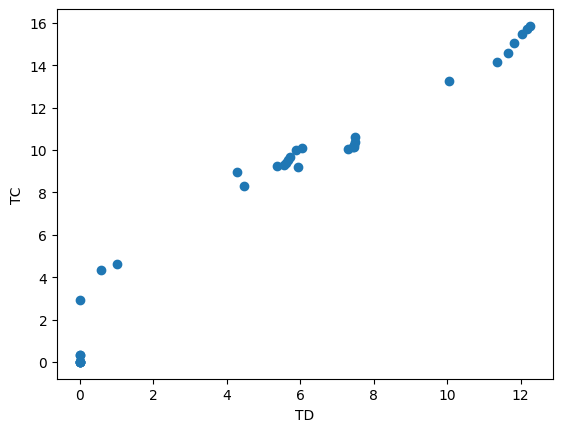

In [ ]:
plt.scatter(x =data_to_vis.TD, y =data_to_vis.TC, )
plt.xlabel('TD')
plt.ylabel('TC')
#to check the correlation of two variable, we need to plot a graph that has two variables as x, and y axis.
#Since we need to check each x and y's distribution in the plot, scatterplot would be an appropriate option.
#In this graph, we can observe that there are strong positive correlation between thsese two variables.

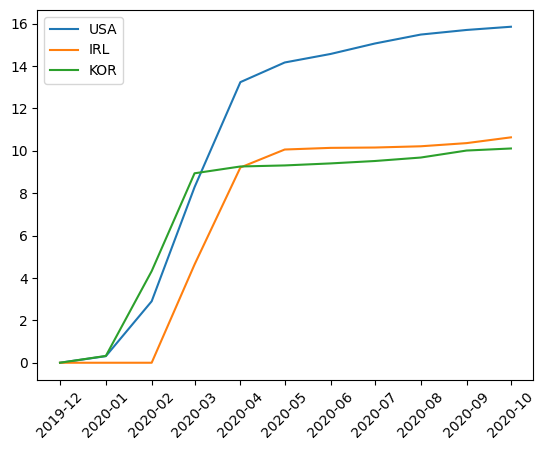

In [ ]:
#4-5
#since the data has time columns, we can analyse the data with longitudinal approach.
#to plot linegraph with time as x axis, we first need to change yr.mon's datatype as datetime.
#lineplot would be a good option to compare how the output differs per timestep, since it is easy to check the change in trend and compare.
data_to_vis['yr.mon'] = pd.to_datetime(data_to_vis['yr.mon'], format='%Y-%m')
kor = data_to_vis[data_to_vis['CODE']== 'KOR']
lrl = data_to_vis[data_to_vis['CODE'] == 'IRL']
usa = data_to_vis[data_to_vis['CODE'] == 'USA']

plt.xticks(rotation =45)
plt.plot(usa['yr.mon'], usa['TC'], label ='USA')
plt.plot(lrl['yr.mon'], lrl['TC'], label = 'IRL')
plt.plot(kor['yr.mon'], kor['TC'], label = 'KOR')
plt.legend()
plt.show()
